<a href="https://colab.research.google.com/github/chejige/Customer-Segmentation-Kmeans-clustering-/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 3.8 MB/s 
     |████████████████████████████████| 133 kB 49.5 MB/s 
     |████████████████████████████████| 1.0 MB 41.9 MB/s 
     |████████████████████████████████| 943 kB 52.2 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 101 kB 10.6 MB/s 
     |████████████████████████████████| 28.5 MB 66.9 MB/s 
     |████████████████████████████████| 965 kB 68.5 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 749 kB 54.8 MB/s 
     |████████████████████████████████| 96 kB 5.2 MB/s 
     |████████████████████████████████| 232 kB 63.4 MB/s 
     |████████████████████████████████| 1.6 MB 47.8 MB/s 
     |█████████████████████

In [2]:
import numpy as np
import pandas as pd
import math
from datetime import timedelta, datetime

import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
%matplotlib inline
plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (20, 5)

# Exploring and preparing the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#upload the data
df1 = pd.read_csv('/content/Customer - Sheet1.csv')

In [6]:
df1.head()

,country,id,week.year,revenue,units
0,KR,702234,3.2019,"808,08",1
1,KR,702234,6.2019,"1606,80",2
2,KR,3618438,8.2019,"803,40",1
3,KR,3618438,9.2019,"803,40",1
4,KR,3618438,9.2019,"803,40",1


In [7]:
df1.shape

(33342, 5)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33342 entries, 0 to 33341
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    33342 non-null  object 
 1   id         33342 non-null  int64  
 2   week.year  33342 non-null  float64
 3   revenue    33342 non-null  object 
 4   units      33342 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.3+ MB


In [9]:
# Splitting 'week.year' column on '.' and creating 'week' and 'year' columns

df1['week'] = df1['week.year'].astype(str).str.split('.').str[0]
df1['year'] = df1['week.year'].astype(str).str.split('.').str[1]

In [10]:
df1.head()

,country,id,week.year,revenue,units,week,year
0,KR,702234,3.2019,"808,08",1,3,2019
1,KR,702234,6.2019,"1606,80",2,6,2019
2,KR,3618438,8.2019,"803,40",1,8,2019
3,KR,3618438,9.2019,"803,40",1,9,2019
4,KR,3618438,9.2019,"803,40",1,9,2019


In [11]:
df1.year.unique()

array(['2019', '202'], dtype=object)

In [12]:
df1.year=df1.year.apply(lambda x:'2020' if x=='202' else x)

In [13]:
df1.year.unique()

array(['2019', '2020'], dtype=object)

In [14]:
df1.week.unique()

array(['3', '6', '8', '9', '13', '12', '16', '18', '17', '21', '19', '23',
       '24', '26', '27', '29', '30', '32', '37', '40', '36', '38', '42',
       '46', '45', '50', '22', '7', '10', '28', '31', '5', '11', '15',
       '14', '20', '25', '34', '35', '33', '39', '43', '41', '44', '47',
       '48', '51', '52', '49', '1', '2', '4'], dtype=object)

In [15]:
# Converting year and week into date, using Monday as first day of the week

df1['date'] = pd.to_datetime(df1['year'].map(str) + df1['week'].map(str) + '-1', format='%Y%W-%w')

In [16]:
df1['date'].head()

0   2019-01-21
1   2019-02-11
2   2019-02-25
3   2019-03-04
4   2019-03-04
Name: date, dtype: datetime64[ns]

In [17]:
df1.columns

Index(['country', 'id', 'week.year', 'revenue', 'units', 'week', 'year',
       'date'],
      dtype='object')

In [18]:
# Removing unnecesary columns

df2 = df1.drop(['week.year', 'week', 'year'], axis=1)

In [19]:
df2.head()

,country,id,revenue,units,date
0,KR,702234,"808,08",1,2019-01-21
1,KR,702234,"1606,80",2,2019-02-11
2,KR,3618438,"803,40",1,2019-02-25
3,KR,3618438,"803,40",1,2019-03-04
4,KR,3618438,"803,40",1,2019-03-04


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33342 entries, 0 to 33341
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   country  33342 non-null  object        
 1   id       33342 non-null  int64         
 2   revenue  33342 non-null  object        
 3   units    33342 non-null  int64         
 4   date     33342 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.3+ MB


In [21]:
df2.revenue=df2.revenue.apply(lambda x:float(x.replace(',','')))

In [22]:
df2.describe()

,id,revenue,units
count,3.334200e+04,3.334200e+04,33342.000000
mean,3.280257e+06,2.762640e+05,7.151071
std,4.239888e+06,1.364602e+06,64.617654
min,6.000180e+05,-1.030010e+07,-87.000000
25%,2.880354e+06,3.677400e+04,1.000000
50%,3.249114e+06,1.153050e+05,1.000000
75%,3.843282e+06,2.219085e+05,2.000000
max,2.419022e+08,5.543684e+07,4000.000000


In [23]:
# We have 33342 transactions in the period of time icluded in the dataset
# Biggest transaction was 4000 units.Most expensive purchase was 2.42 Millions

In [24]:
df2.isnull().sum()

country    0
id         0
revenue    0
units      0
date       0
dtype: int64

In [25]:
# Let's view the period of time included in the dataset

df2['date'].min()

Timestamp('2019-01-07 00:00:00')

In [26]:
df2['date'].max()

Timestamp('2020-01-06 00:00:00')

In [27]:
# Let's explore in how many different countries we have sales in that period

df2['country'].unique()

array(['KR', 'PK', 'MM', 'ID', 'TR', 'VN', 'PH', 'AF', 'IQ', 'JP', 'CN',
       'IN', 'SA', 'TH', 'BD', 'MY', 'IR'], dtype=object)

In [28]:
df2['country'].nunique()

17

In [31]:
# Putting date into the index for plotting the time series

df2b = df2.set_index("date")
df2b.head()

,country,id,revenue,units
date,,,,
2019-01-21,KR,702234,80808.0,1
2019-02-11,KR,702234,160680.0,2
2019-02-25,KR,3618438,80340.0,1
2019-03-04,KR,3618438,80340.0,1
2019-03-04,KR,3618438,80340.0,1


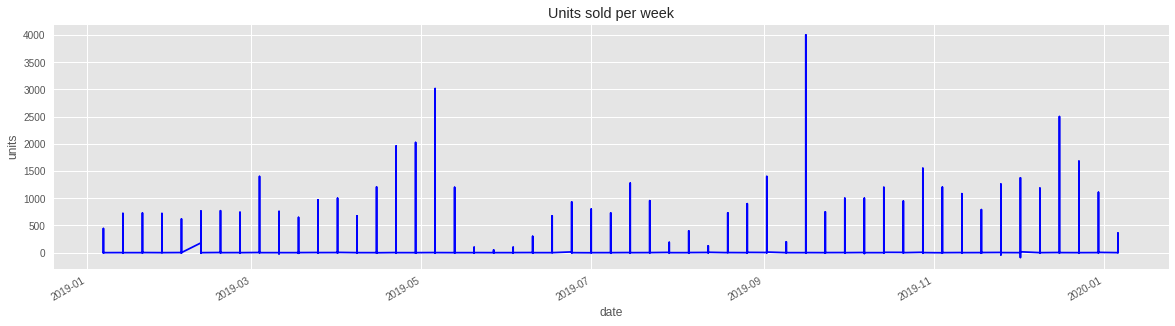

In [32]:
plt.style.use('ggplot')
plt.title('Units sold per week')
plt.ylabel('units')
plt.xlabel('date');
df2b['units'].plot(figsize=(20,5), c='blue');

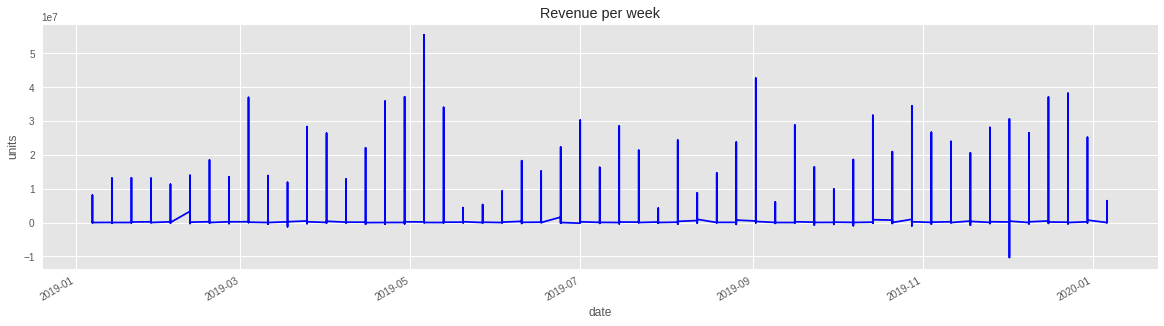

In [33]:
plt.style.use('ggplot')
plt.title('Revenue per week')
plt.ylabel('units')
plt.xlabel('date');
df2b['revenue'].plot(figsize=(20,5), c='blue');

In [34]:
# For greater visibility in the plots we convert the dates to monthly periods and we aggregate the units and revenue of the same period

df2c = df2b.to_period("M")

In [35]:
df2c.head()

,country,id,revenue,units
date,,,,
2019-01,KR,702234,80808.0,1
2019-02,KR,702234,160680.0,2
2019-02,KR,3618438,80340.0,1
2019-03,KR,3618438,80340.0,1
2019-03,KR,3618438,80340.0,1


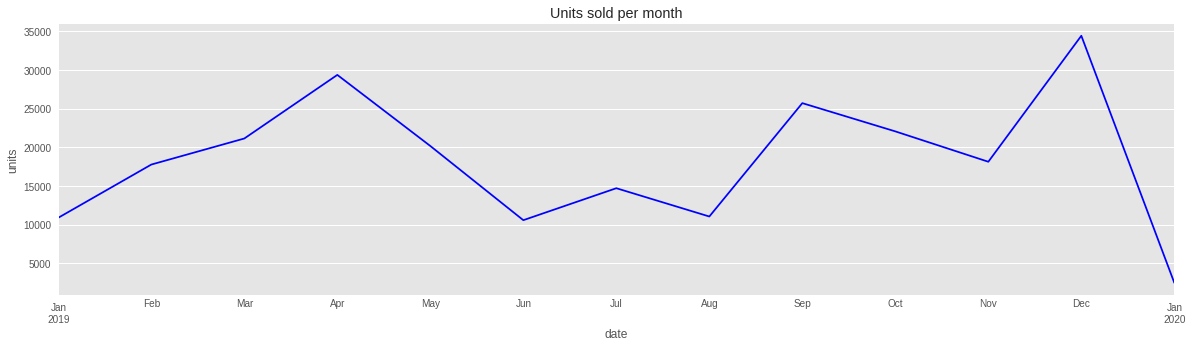

In [36]:
plt.style.use('ggplot')
df2c['units'].groupby('date').agg(sum).plot(figsize=(20,5), c='blue')
plt.title('Units sold per month')
plt.ylabel('units')
plt.xlabel('date');

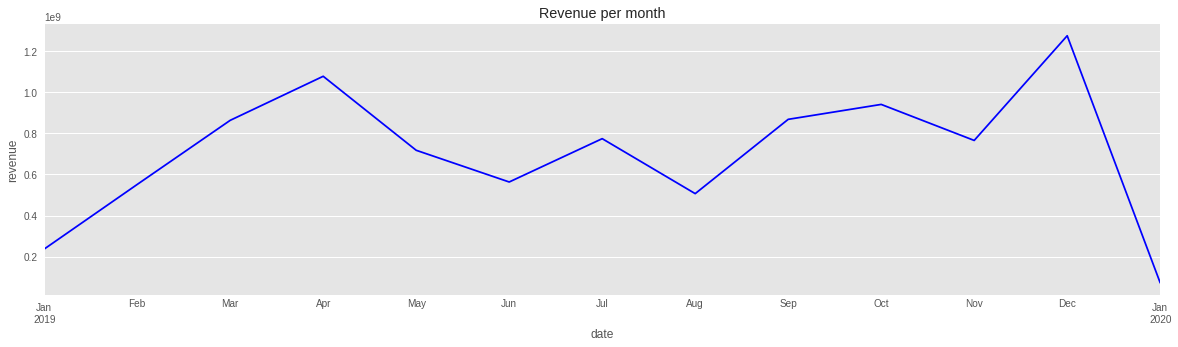

In [37]:
plt.style.use('ggplot')
df2c['revenue'].groupby('date').agg(sum).plot(figsize=(20,5), c='blue')
plt.title('Revenue per month')
plt.ylabel('revenue')
plt.xlabel('date');

### Transform data to obtain features

In [38]:
print('Sales from {} to {}'.format(df2['date'].min(),
                                    df2['date'].max()))

Sales from 2019-01-07 00:00:00 to 2020-01-06 00:00:00


In [39]:
#Let's focus on sales from last 365 days since most recent date

period = 365
date_N_days_ago = df2['date'].max() - timedelta(days=period)

In [40]:
# We remove the rows with dates older than 365 days ago

df2 = df2[df2['date']> date_N_days_ago]

In [41]:
df2.reset_index(drop=True, inplace=True)

In [42]:
df2.head()

,country,id,revenue,units,date
0,KR,702234,80808.0,1,2019-01-21
1,KR,702234,160680.0,2,2019-02-11
2,KR,3618438,80340.0,1,2019-02-25
3,KR,3618438,80340.0,1,2019-03-04
4,KR,3618438,80340.0,1,2019-03-04


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33342 entries, 0 to 33341
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   country  33342 non-null  object        
 1   id       33342 non-null  int64         
 2   revenue  33342 non-null  float64       
 3   units    33342 non-null  int64         
 4   date     33342 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.3+ MB


In [44]:
# There are customers with the same 'id' in several countries. This causes errors in the monetary values
# Let's create a unique 'id+' identifier that combines country code and customer id

df3 = df2.copy()

df3['id+'] = df3['country'].map(str) + df3['id'].map(str)

In [45]:
df3.head()

,country,id,revenue,units,date,id+
0,KR,702234,80808.0,1,2019-01-21,KR702234
1,KR,702234,160680.0,2,2019-02-11,KR702234
2,KR,3618438,80340.0,1,2019-02-25,KR3618438
3,KR,3618438,80340.0,1,2019-03-04,KR3618438
4,KR,3618438,80340.0,1,2019-03-04,KR3618438


In [46]:
# We set the NOW date one day after the last sale

NOW = df3['date'].max() + timedelta(days=1)
NOW

Timestamp('2020-01-07 00:00:00')

# 1. Days since last purchase and frequency per customer

In [47]:
# We add a column, 'days_since_last_purchase', with the days between purchase date and the latest date

df3['days_since_purchase'] = df3['date'].apply(lambda x:(NOW - x).days)

In [48]:
df3.head()

,country,id,revenue,units,date,id+,days_since_purchase
0,KR,702234,80808.0,1,2019-01-21,KR702234,351
1,KR,702234,160680.0,2,2019-02-11,KR702234,330
2,KR,3618438,80340.0,1,2019-02-25,KR3618438,316
3,KR,3618438,80340.0,1,2019-03-04,KR3618438,309
4,KR,3618438,80340.0,1,2019-03-04,KR3618438,309


In [49]:
# Recency will be the minimum of 'days_since_last_purchase' for each customer
# Frequency will be the total number of orders in the period for each customer

aggr = {
    'days_since_purchase': lambda x:x.min(),
    'date': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)])
}

In [50]:
aggr

{'days_since_purchase': <function __main__.<lambda>(x)>,
 'date': <function __main__.<lambda>(x)>}

In [51]:
rfm = df3.groupby('id+').agg(aggr).reset_index()
rfm.rename(columns={'date': 'frequency'},inplace=True)

In [52]:
rfm

,id+,days_since_purchase,frequency
0,AF1915092,246,6
1,AF1915452,267,1
2,AF1918074,323,1
3,AF1920168,120,1
4,AF2137002,351,1
...,...,...,...
5831,VN973458,267,1
5832,VN974430,78,6
5833,VN980442,295,1
5834,VN989970,127,1


# 2. Revenue per customer ID

In [53]:
# We get the revenue of the last 365 days per customer

df_revenue=df3[df3['date'] >= NOW - timedelta(days=period)].groupby('id+')['revenue'].sum()
df_revenue

id+
AF1915092     44712.0
AF1915452     19908.0
AF1918074     19428.0
AF1920168     12942.0
AF2137002     20994.0
               ...   
VN973458     134280.0
VN974430      98298.0
VN980442      78420.0
VN989970      41988.0
VN991620     157170.0
Name: revenue, Length: 5836, dtype: float64

In [54]:
rfm=pd.merge(rfm, df_revenue, on='id+', how="left")

In [55]:
rfm.head()

,id+,days_since_purchase,frequency,revenue
0,AF1915092,246,6,44712.0
1,AF1915452,267,1,19908.0
2,AF1918074,323,1,19428.0
3,AF1920168,120,1,12942.0
4,AF2137002,351,1,20994.0


In [56]:
# Checking monetary value is correct by checking on our biggest customer

rfm[rfm['revenue']==rfm['revenue'].max()]

,id+,days_since_purchase,frequency,revenue
5296,TR4341960,1,116,912515112.0


## Visulize features

In [57]:
import plotly.graph_objects as go
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("days since last purchase", 
                                   "frequency", 
                                   "Total Spending"))

fig.append_trace(go.Histogram(x=rfm.days_since_purchase),
                 row=1, col=1)

fig.append_trace(go.Histogram(x=rfm.frequency),
                 row=2, col=1)

fig.append_trace(go.Histogram(x=rfm.revenue),
                 row=3, col=1)

fig.update_layout(height=800, width=800,
                  title_text="Distribution of the Features")

fig.show()

## Scale Features: Log Transformation

In [58]:
def apply_log1p_transformation(dataframe, column):
    '''This function takes a dataframe and a column in the string format
    then applies numpy log1p transformation to the column
    as a result returns log1p applied pandas series'''
    
    dataframe["log_" + column] = np.log1p(dataframe[column])
    return dataframe["log_" + column]

In [59]:
apply_log1p_transformation(rfm, "days_since_purchase")

0       5.509388
1       5.590987
2       5.780744
3       4.795791
4       5.863631
          ...   
5831    5.590987
5832    4.369448
5833    5.690359
5834    4.852030
5835    4.795791
Name: log_days_since_purchase, Length: 5836, dtype: float64

In [60]:
apply_log1p_transformation(rfm, "frequency")

0       1.945910
1       0.693147
2       0.693147
3       0.693147
4       0.693147
          ...   
5831    0.693147
5832    1.945910
5833    0.693147
5834    0.693147
5835    2.197225
Name: log_frequency, Length: 5836, dtype: float64

In [61]:
apply_log1p_transformation(rfm, "revenue")

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning:

invalid value encountered in log1p



0       10.708020
1        9.898927
2        9.874522
3        9.468310
4        9.952040
          ...    
5831    11.807690
5832    11.495769
5833    11.269847
5834    10.645163
5835    11.965090
Name: log_revenue, Length: 5836, dtype: float64

In [62]:
rfm.head()

,id+,days_since_purchase,frequency,revenue,log_days_since_purchase,log_frequency,log_revenue
0,AF1915092,246,6,44712.0,5.509388,1.945910,10.708020
1,AF1915452,267,1,19908.0,5.590987,0.693147,9.898927
2,AF1918074,323,1,19428.0,5.780744,0.693147,9.874522
3,AF1920168,120,1,12942.0,4.795791,0.693147,9.468310
4,AF2137002,351,1,20994.0,5.863631,0.693147,9.952040


In [63]:
fig = make_subplots(rows=3, cols=1,
                   subplot_titles=("days since last purchase", 
                                   "frequency", 
                                   "Total Spending"))

fig.append_trace(go.Histogram(x=rfm.log_days_since_purchase),
                 row=1, col=1)

fig.append_trace(go.Histogram(x=rfm.log_frequency),
                 row=2, col=1)

fig.append_trace(go.Histogram(x=rfm.log_revenue),
                 row=3, col=1)

fig.update_layout(height=800, width=800,
                  title_text="Distribution of the Features")

fig.show()

# Create K-means model

In [64]:
rfm.isna().sum()

id+                        0
days_since_purchase        0
frequency                  0
revenue                    0
log_days_since_purchase    0
log_frequency              0
log_revenue                4
dtype: int64

In [65]:
rfm.dropna(inplace=True)

In [66]:
customers=rfm.copy()

In [67]:
X = customers.iloc[:, 4:]

In [68]:
X.head()

,log_days_since_purchase,log_frequency,log_revenue
0,5.509388,1.945910,10.708020
1,5.590987,0.693147,9.898927
2,5.780744,0.693147,9.874522
3,4.795791,0.693147,9.468310
4,5.863631,0.693147,9.952040


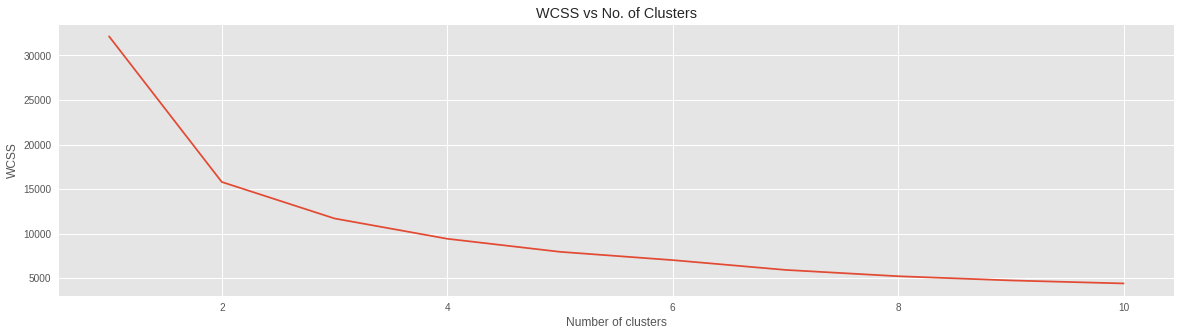

In [69]:
from sklearn.cluster import KMeans
#wcss stands for 'within clusters sum of squares'
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('WCSS vs No. of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [70]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 0)
customers['Cluster_Prediction'] = kmeans.fit_predict(X)

In [71]:
customers.head()

,id+,days_since_purchase,frequency,revenue,log_days_since_purchase,log_frequency,log_revenue,Cluster_Prediction
0,AF1915092,246,6,44712.0,5.509388,1.945910,10.708020,2
1,AF1915452,267,1,19908.0,5.590987,0.693147,9.898927,2
2,AF1918074,323,1,19428.0,5.780744,0.693147,9.874522,2
3,AF1920168,120,1,12942.0,4.795791,0.693147,9.468310,2
4,AF2137002,351,1,20994.0,5.863631,0.693147,9.952040,2


### Visualization

In [72]:
#get the centroids of the clusters by the cluster_centers_ attribute of KMeans algorithm
kmeans.cluster_centers_

array([[ 5.32240578,  0.90203721, 11.75754647],
       [ 2.91751181,  2.03753971, 13.47053516],
       [ 5.28163201,  0.76059345,  9.95822293],
       [ 2.52638382,  3.07622583, 15.53321202],
       [ 3.49066229,  1.09675328, 11.35195732],
       [ 4.75148842,  1.46458558, 13.35600582]])

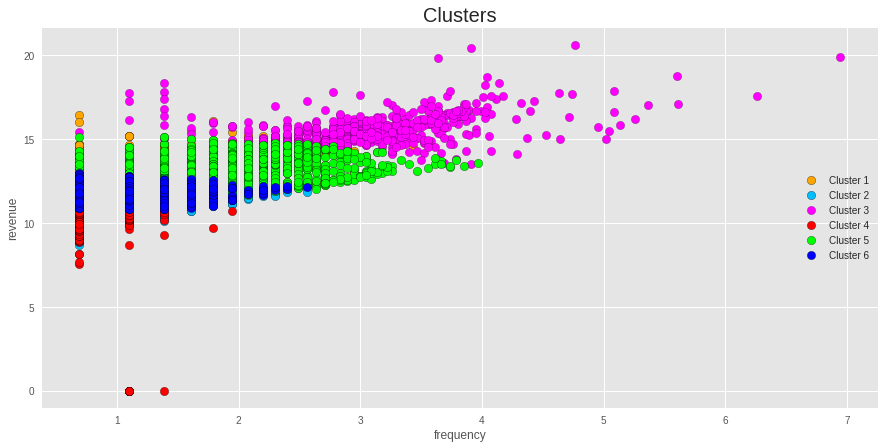

In [73]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=customers[customers['Cluster_Prediction'] == 5]['log_frequency'],
            y=customers[customers['Cluster_Prediction'] == 5]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 4]['log_frequency'],
            y=customers[customers['Cluster_Prediction'] == 4]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 3]['log_frequency'],
            y=customers[customers['Cluster_Prediction'] == 3]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 2]['log_frequency'],
            y=customers[customers['Cluster_Prediction'] == 2]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 1]['log_frequency'],
            y=customers[customers['Cluster_Prediction'] == 1]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 0]['log_frequency'],
            y=customers[customers['Cluster_Prediction'] == 0]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='blue', label='Cluster 6')




plt.legend(loc='right')

plt.xlabel('frequency')
plt.ylabel('revenue')
plt.title('Clusters', fontsize = 20)
plt.show()

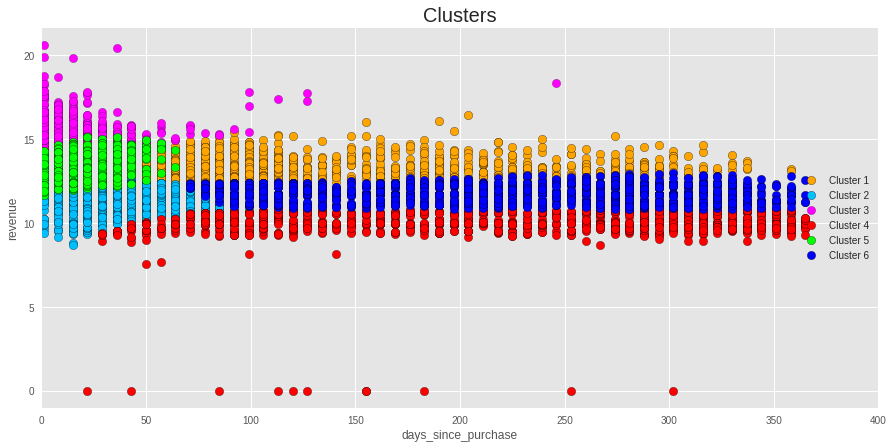

In [74]:
fig, ax = plt.subplots(figsize=(15,7)) 
plt.scatter(x=customers[customers['Cluster_Prediction'] == 5]['days_since_purchase'],
            y=customers[customers['Cluster_Prediction'] == 5]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='orange', label='Cluster 1')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 4]['days_since_purchase'],
            y=customers[customers['Cluster_Prediction'] == 4]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='deepskyblue', label='Cluster 2')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 3]['days_since_purchase'],
            y=customers[customers['Cluster_Prediction'] == 3]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.2, c='Magenta', label='Cluster 3')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 2]['days_since_purchase'],
            y=customers[customers['Cluster_Prediction'] == 2]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='red', label='Cluster 4')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 1]['days_since_purchase'],
            y=customers[customers['Cluster_Prediction'] == 1]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='lime', label='Cluster 5')

plt.scatter(x=customers[customers['Cluster_Prediction'] == 0]['days_since_purchase'],
            y=customers[customers['Cluster_Prediction'] == 0]['log_revenue'],
            s=70,edgecolor='black', linewidth=0.3, c='blue', label='Cluster 6')




plt.legend(loc='right')
plt.xlim(0,400)
plt.xlabel('days_since_purchase')
plt.ylabel('revenue')
plt.title('Clusters', fontsize = 20)
plt.show()

# Analysis

> Indented block
Analyzing Data using the above graph becomes much more easier as it gives us a visual aid for better understanding of the data. Kmeans has divided the dataset into 6 clusters based on days_since_purchase,	frequency,	revenue of the individual customers. The following clusters are created by the model,

*   Cluster Orange
*   Cluster Skyblue
*   Cluster Purple
*   Cluster Red
*   Cluster Green
*   Cluster blue






### Segment	Description
* **Cluster Skyblue**	Bought recently, low average revenue and frequency.So they are recent shoppers, but haven’t spent much. 
* **Cluster red** Purchased  some time ago. Low average revenue and frequency. Purchased long time ago and never came back. They are hibernating customer.
* **Cluster blue** Purchased  some time ago. Around average revenue and blow average frequency. These customer has good purchasing ability. Will lose them if not reactivated.
* **Cluster green** Bought recently, higher than average revenue.There are potential loyalists customer.
* **Cluster orange** Purchased  some time ago, higher than average revenue. May not have bought very recently though.Need to bring them back!
* **Cluster purple** Buy on a regular basis with high revenue. They are the most promising customer.


In [75]:
# We create a segment map of only 11 segments based on only two scores: 'r' and 'fm'

segment_map = {
    r'0': 'can not lose',
    r'1': 'new customers with high buying ability',
    r'2': 'may lose',
    r'3': 'champions',
    r'4': 'new customers with low buying ability',
    r'5': 'need bring back',
    
}

customers['segment']=customers['Cluster_Prediction'].map(str)
customers['segment'] = customers['segment'].replace(segment_map, regex=True)
customers.head()

,id+,days_since_purchase,frequency,revenue,log_days_since_purchase,log_frequency,log_revenue,Cluster_Prediction,segment
0,AF1915092,246,6,44712.0,5.509388,1.945910,10.708020,2,may lose
1,AF1915452,267,1,19908.0,5.590987,0.693147,9.898927,2,may lose
2,AF1918074,323,1,19428.0,5.780744,0.693147,9.874522,2,may lose
3,AF1920168,120,1,12942.0,4.795791,0.693147,9.468310,2,may lose
4,AF2137002,351,1,20994.0,5.863631,0.693147,9.952040,2,may lose


In [76]:
customers.isnull().sum()

id+                        0
days_since_purchase        0
frequency                  0
revenue                    0
log_days_since_purchase    0
log_frequency              0
log_revenue                0
Cluster_Prediction         0
segment                    0
dtype: int64

### Exploring the customers segments

In [77]:
customers['segment'].unique()

array(['may lose', 'can not lose',
       'new customers with low buying ability',
       'new customers with high buying ability', 'need bring back',
       'champions'], dtype=object)

In [78]:
# We take a look on some segments

customers[customers['segment']=="can not lose"].sort_values(by='revenue', ascending=False)

,id+,days_since_purchase,frequency,revenue,log_days_since_purchase,log_frequency,log_revenue,Cluster_Prediction,segment
3800,IN1807500,302,1,423858.0,5.713733,0.693147,12.957156,0,can not lose
803,ID2859516,281,1,402270.0,5.641907,0.693147,12.904881,0,can not lose
4231,KR932142,295,1,393960.0,5.690359,0.693147,12.884007,0,can not lose
1911,ID3010620,232,1,390282.0,5.451038,0.693147,12.874627,0,can not lose
1665,ID2932062,330,1,387798.0,5.802118,0.693147,12.868242,0,can not lose
...,...,...,...,...,...,...,...,...,...
5528,VN3493374,330,2,51672.0,5.802118,1.098612,10.852691,0,can not lose
5646,VN4097850,274,3,51618.0,5.616771,1.386294,10.851645,0,can not lose
32,BD2536170,316,2,51270.0,5.758902,1.098612,10.844881,0,can not lose
5125,TR3275196,281,2,51042.0,5.641907,1.098612,10.840424,0,can not lose


In [79]:
customers[customers['segment']=='champions'].sort_values(by='revenue', ascending=False).head(10)

,id+,days_since_purchase,frequency,revenue,log_days_since_purchase,log_frequency,log_revenue,Cluster_Prediction,segment
5296,TR4341960,1,116,912515112.0,0.693147,4.762174,20.631715,3,champions
2932,ID3929094,36,49,729091158.0,3.610918,3.912023,20.407309,3,champions
4983,TR3249114,1,1036,432250740.0,0.693147,6.944087,19.884516,3,champions
5317,TR4422780,15,37,408000726.0,2.772589,3.637586,19.826780,3,champions
4559,PH4245048,1,271,140831226.0,0.693147,5.605802,18.763073,3,champions
3161,ID4052706,8,56,131149698.0,2.197225,4.043051,18.691850,3,champions
5301,TR4358328,246,3,92094978.0,5.509388,1.386294,18.338331,3,champions
3016,ID3983442,1,62,89870640.0,0.693147,4.143135,18.313882,3,champions
865,ID2864466,1,55,81001620.0,0.693147,4.025352,18.209980,3,champions
5261,TR4153698,1,41,58278018.0,0.693147,3.737670,17.880736,3,champions


In [80]:
customers['revenue'].mean()

1579532.140946502

In [81]:
# We export the dataframe to a CSV file for later processing it in Teabula
# (We added the parameter float_format='%.2f' for setting numbers to two decimals)

customers.to_csv('customers.csv', encoding='utf-8', index=False, float_format='%.2f')